In [2]:
import xarray as xr
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
from cae_tools.models.conv_ae_model import ConvAEModel
from cae_tools.models.model_evaluator import ModelEvaluator

In [3]:
os.chdir(r"/lustre_scratch/MEH04/data/")
train_path = r"train_ds.nc"
train_ds = xr.open_dataset(train_path)
test_path = r"test_ds.nc"
test_ds = xr.open_dataset(test_path)
mt = ConvAEModel()
mt.load("model1")

In [4]:
mt.apply(train_ds, ["sstL4"], "gRsst_estimate")
mt.apply(test_ds, ["sstL4"], "gRsst_estimate")
train_ds.to_netcdf(r"train_scores.nc")
test_ds.to_netcdf(r"test_scores.nc")

Text(0.5, 1.0, 'gRsst_estimate')

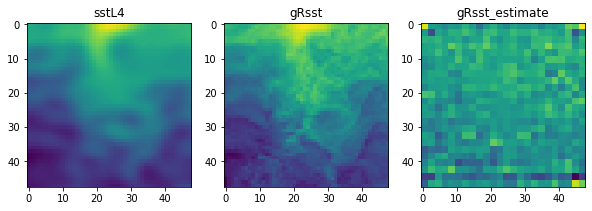

In [5]:
plot_index = np.random.randint(len(test_ds.sstL4))
fig, ax = plt.subplots(1,3, figsize = (10,10))
ax[0].imshow(test_ds.sstL4[plot_index].data[0])
ax[0].set_title('sstL4')
ax[1].imshow(test_ds.gRsst[plot_index].data[0])
ax[1].set_title('gRsst')
ax[2].imshow(test_ds.gRsst_estimate[plot_index].data[0])
ax[2].set_title('gRsst_estimate')

RMSE

(array([ 61., 239., 207., 102.,  53.,  23.,  13.,   7.,   2.,   3.]),
 array([0.04598437, 0.107559  , 0.16913363, 0.23070827, 0.2922829 ,
        0.35385755, 0.41543218, 0.4770068 , 0.53858143, 0.60015607,
        0.6617307 ], dtype=float32),
 <BarContainer object of 10 artists>)

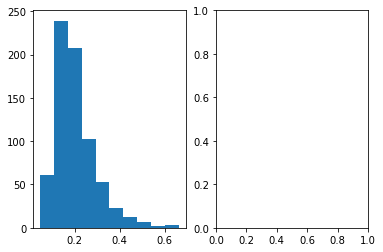

In [6]:
rmse_sstL4 = (((test_ds.sstL4 - test_ds.gRsst)**2).sum(dim={'x','y'})/len(test_ds.sstL4))**(1/2)
#rmse_estimate = (((test_ds.gRsst_estimate - test_ds.gRsst)**2).sum(dim={'x','y'})/len(test_ds.sstL4))**(1/2)
fig, ax = plt.subplots(1,2)
ax[0].hist(rmse_sstL4.data)
#ax[1].hist(rmse_estimate.data)

Power spectrum